In [2]:
import sys
sys.path.append('..')
from network_rt_simulation import NetworkSimulator
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot_2samples 
import numpy as np

### Define the parameters for the DDM and neural circuit model, find the optimal $c_1$ that minimizes the error

In [3]:
# Load saved RT data
DDM_params = {
    'v': .5,
    'sig_W': .5,
    'boundary': .8,
    'dt':1.,
    'dt_DDM': 25.
}

CANN_params = {
    'dur1': 500,
    'dur2': 2000,
    'edge_type': 'tanh', 
    'num': 1024,
    'tau_bump': 0.08,
    'tau_edge': 4,
    'beta': 2,
    'offset': 3.85,
    'delta_z': 1/40,
    'J0_bump': 4,
    'J0_edge': 1,
    'a': 0.25,
    'A': 10,
    'c2': 1
}
CANN_params.update({'c1': 2.563})
c1_range = np.linspace(0.1, 4, 20)
#mon_vars = ['s_pos', 'clicks_left', 'clicks_right']
mon_vars = None
Simulator = NetworkSimulator(DDM_params, CANN_params, mon_vars=mon_vars, save_runner=False, c1_range=c1_range)
#c1_opt, err_per_c1 = Simulator.find_optimal_c1(c1_range)
#_, _ = Simulator.simulate_network(num_trials=1, batch_size=1)

Text(0.5, 1.0, 'Mean Error vs c1 with Error Bars')

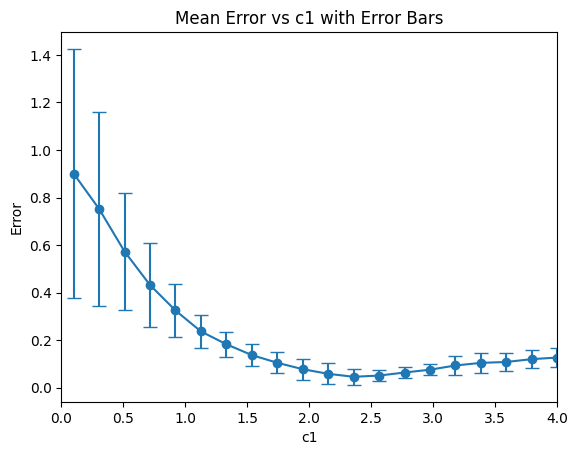

: 

In [ ]:
mean_err = np.mean(Simulator.err_per_c1, axis=1)
std_err = np.std(Simulator.err_per_c1, axis=1)
plt.figure()
plt.errorbar(c1_range, mean_err, yerr=std_err, fmt='o-', capsize=5)
plt.xlabel('c1')
plt.xlim([0,4])
plt.ylabel('Error')
plt.title('Mean Error vs c1 with Error Bars')

### Simulate 1000 trials

In [4]:
num_trials = 100
batch_size = 10
RT_sim_corr, RT_sim_incorr = Simulator.simulate_network(num_trials=num_trials, batch_size=batch_size)



Starting simulation with 100 trials in 10 batches of size 10
Memory threshold set to: 8000 MiB

Processing Batch 1/10 (Trials 1-10)
--------------------------------------------------


Trials in batch 1: 100%|████████████████████████| 10/10 [00:32<00:00,  3.22s/it]



Batch 1 completed:
Correct responses: 7
Incorrect responses: 0
Memory after batch 1: 582.69 MiB
--------------------------------------------------

Processing Batch 2/10 (Trials 11-20)
--------------------------------------------------


Trials in batch 2: 100%|████████████████████████| 10/10 [00:29<00:00,  2.95s/it]



Batch 2 completed:
Correct responses: 6
Incorrect responses: 1
Memory after batch 2: 883.04 MiB
--------------------------------------------------

Processing Batch 3/10 (Trials 21-30)
--------------------------------------------------


Trials in batch 3: 100%|████████████████████████| 10/10 [00:30<00:00,  3.10s/it]



Batch 3 completed:
Correct responses: 7
Incorrect responses: 0
Memory after batch 3: 1112.91 MiB
--------------------------------------------------

Processing Batch 4/10 (Trials 31-40)
--------------------------------------------------


Trials in batch 4: 100%|████████████████████████| 10/10 [00:30<00:00,  3.05s/it]



Batch 4 completed:
Correct responses: 7
Incorrect responses: 0
Memory after batch 4: 1320.12 MiB
--------------------------------------------------

Processing Batch 5/10 (Trials 41-50)
--------------------------------------------------


Trials in batch 5: 100%|████████████████████████| 10/10 [00:31<00:00,  3.13s/it]



Batch 5 completed:
Correct responses: 5
Incorrect responses: 0
Memory after batch 5: 1538.00 MiB
--------------------------------------------------

Processing Batch 6/10 (Trials 51-60)
--------------------------------------------------


Trials in batch 6: 100%|████████████████████████| 10/10 [00:29<00:00,  2.99s/it]



Batch 6 completed:
Correct responses: 6
Incorrect responses: 0
Memory after batch 6: 1748.29 MiB
--------------------------------------------------

Processing Batch 7/10 (Trials 61-70)
--------------------------------------------------


Trials in batch 7: 100%|████████████████████████| 10/10 [00:29<00:00,  2.92s/it]



Batch 7 completed:
Correct responses: 7
Incorrect responses: 0
Memory after batch 7: 1952.08 MiB
--------------------------------------------------

Processing Batch 8/10 (Trials 71-80)
--------------------------------------------------


Trials in batch 8: 100%|████████████████████████| 10/10 [00:30<00:00,  3.07s/it]



Batch 8 completed:
Correct responses: 6
Incorrect responses: 1
Memory after batch 8: 2163.95 MiB
--------------------------------------------------

Processing Batch 9/10 (Trials 81-90)
--------------------------------------------------


Trials in batch 9: 100%|████████████████████████| 10/10 [00:29<00:00,  2.98s/it]



Batch 9 completed:
Correct responses: 6
Incorrect responses: 0
Memory after batch 9: 2377.18 MiB
--------------------------------------------------

Processing Batch 10/10 (Trials 91-100)
--------------------------------------------------


Trials in batch 10: 100%|███████████████████████| 10/10 [00:29<00:00,  2.99s/it]



Batch 10 completed:
Correct responses: 5
Incorrect responses: 0
Memory after batch 10: 2592.86 MiB
--------------------------------------------------

Simulation completed!
Total correct responses: 62
Total incorrect responses: 2
Final CPU Memory Usage: 2592.86 MiB


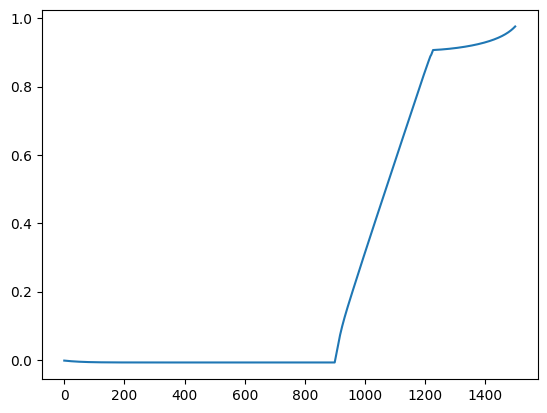

In [55]:
#plt.plot(Simulator.runners_log[0].mon.u_pos[:2000])
plt.plot(Simulator.runners_log[0].mon.s_pos[:1500])
#plt.plot(np.diff(Simulator.runners_log[0].mon.s_pos[900:1500]))

### plot RT distribution 

Discrete simulation parameters: step length dl = 0.08004, probability p = 0.57809


(array([11., 46., 60., 30., 37., 38., 18., 28., 30., 29., 15., 22., 13.,
         8., 11., 14.,  5.,  5.,  5.,  3.,  4.,  8.,  7.,  3.,  3.,  6.,
         4.,  5.,  2.,  1.,  0.,  1.,  0.,  2.,  2.,  2.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.25 , 0.385, 0.52 , 0.655, 0.79 , 0.925, 1.06 , 1.195, 1.33 ,
        1.465, 1.6  , 1.735, 1.87 , 2.005, 2.14 , 2.275, 2.41 , 2.545,
        2.68 , 2.815, 2.95 , 3.085, 3.22 , 3.355, 3.49 , 3.625, 3.76 ,
        3.895, 4.03 , 4.165, 4.3  , 4.435, 4.57 , 4.705, 4.84 , 4.975,
        5.11 , 5.245, 5.38 , 5.515, 5.65 , 5.785, 5.92 , 6.055, 6.19 ,
        6.325, 6.46 , 6.595, 6.73 , 6.865, 7.   ]),
 <BarContainer object of 50 artists>)

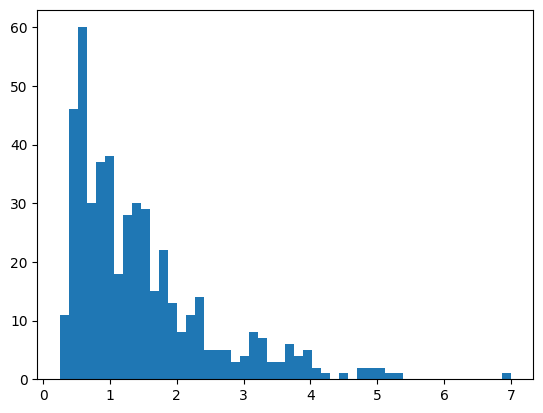

In [27]:
num_trials=500
pos_RT_dice, neg_RT_dice = Simulator.generate_dice_RT(n_trials=num_trials)
plt.hist(pos_RT_dice, bins=50)


Discrete simulation parameters: step length dl = 0.08047, probability p = 0.59321


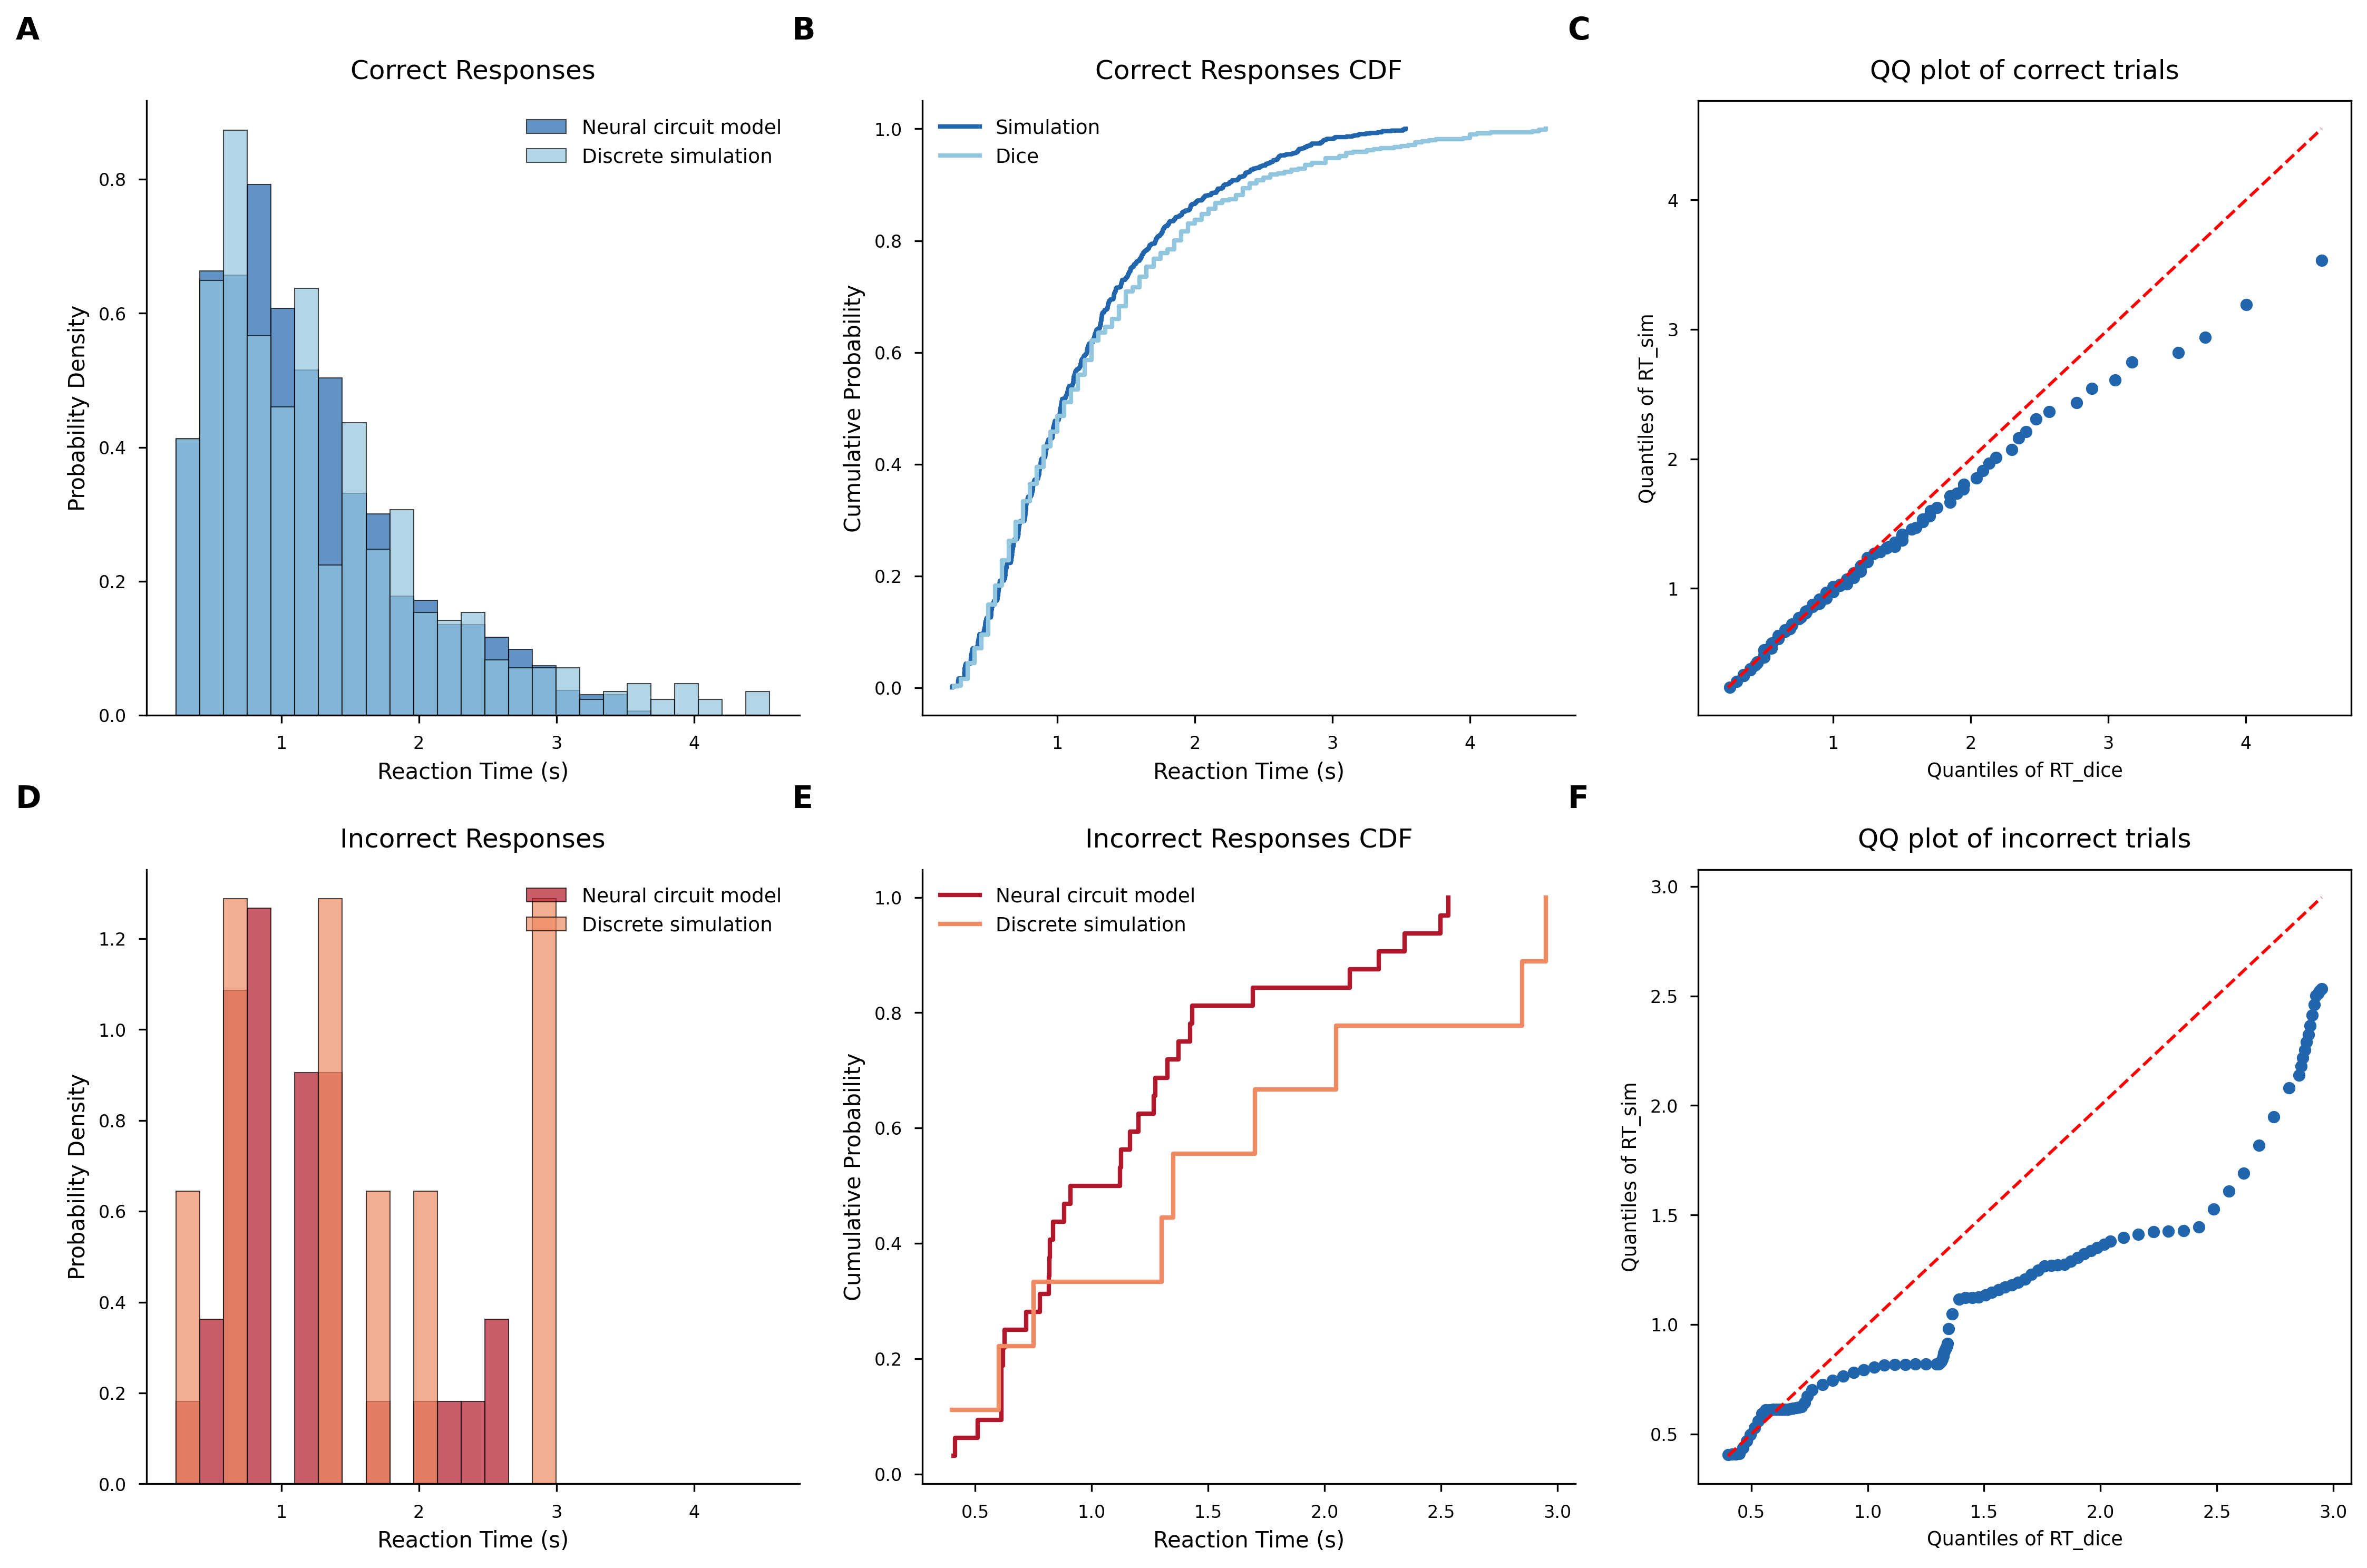

In [3]:

num_trials=500
RT_corr = np.load('RT_corr.npy')
RT_incorr = np.load('RT_incorr.npy')

# Run dice simulation with same parameters
pos_RT_dice, neg_RT_dice = Simulator.generate_dice_RT(DDM_params, n_trials=num_trials)




# Plot RT distributions
plot_rt_distribution(
    RT_corr, RT_incorr,
    pos_RT_dice, neg_RT_dice,
    show_plot=True
)

# # Create QQ plot with improved styling
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111)

# # Plot correct RTs with publication-style formatting
# #stats.probplot(RT_corr, RT_incorr, plot=plt)
# qqplot_2samples(RT_corr, RT_incorr, line='45', ax=plt.gca()) # Modified line

# # Customize QQ plot appearance
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_title("Normal Q-Q Plot of Response Times", fontsize=12, pad=15)
# ax.set_xlabel("Theoretical Quantiles", fontsize=10)
# ax.set_ylabel("Sample Quantiles", fontsize=10)
# ax.tick_params(axis='both', which='major', labelsize=9)

# # Add grid for better readability
# ax.grid(True, linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

In [ ]:



fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Positive RT
axs[0].plot(q_pos, q_corr, 'o')
axs[0].plot([min(q_pos.min(), q_corr.min()), max(q_pos.max(), q_corr.max())],
            [min(q_pos.min(), q_corr.min()), max(q_pos.max(), q_corr.max())],
            'r--')
axs[0].set_title("correct trials")
#axs[0].set_xlabel("Quantiles of pos_RT_sim")
#axs[0].set_ylabel("Quantiles of RT_corr (s)")
axs[0].grid(True)

# Negative RT
axs[1].plot(q_neg, q_corr, 'o')
axs[1].plot([min(q_neg.min(), q_corr.min()), max(q_neg.max(), q_corr.max())],
            [min(q_neg.min(), q_corr.min()), max(q_neg.max(), q_corr.max())],
            'r--')
axs[1].set_title("Incorrect Trials")
#axs[1].set_xlabel("Quantiles of neg_RT_sim")
axs[1].grid(True)

plt.tight_layout()
plt.show()